In [1]:
import numpy as np
import matplotlib.pyplot as plt

import henon_map_cpp as hm

In [7]:
test_particle = hm.particles(
    np.array([0.1, 0.2]),
    np.array([0.1, 0.2]),
    np.array([0.1, 0.2]),
    np.array([0.1, 0.2]),
)

In [8]:
test_particle.add_ghost(1e-6, "x")
test_particle.add_ghost(1e-6, "px")
test_particle.add_ghost(1e-6, "y")
test_particle.add_ghost(1e-6, "py")

In [9]:
test_particle.get_displacement_direction().shape

(4, 2, 4)

In [11]:
test_particle.get_displacement_module().shape

(2, 4)

In [12]:
print(test_particle.get_displacement_module())
print(test_particle.get_displacement_direction())

[[1.e-06 1.e-06 1.e-06 1.e-06]
 [1.e-06 1.e-06 1.e-06 1.e-06]]
[[[1. 0. 0. 0.]
  [1. 0. 0. 0.]]

 [[0. 1. 0. 0.]
  [0. 1. 0. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]]]


In [13]:
tracker = hm.henon_tracker(10000000, 0.31, 0.32, "sps")

creating gpu tracker


In [14]:
tracker.track(test_particle, 10, 0.0)

In [15]:
print(test_particle.get_displacement_module())
print(test_particle.get_displacement_direction())

[[1.20979365e-06 1.20867294e-06 7.56657378e-07 1.72331794e-06]
 [2.39233282e-06 1.90266132e-06 1.24834940e-06 3.36351653e-06]]
[[[ 0.42450366  0.55144131 -0.00198495  0.33805085]
  [-0.3548245   0.73205697 -0.16842161  0.52595998]]

 [[-0.82057404  0.78262658  0.33382239  0.11899052]
  [-0.75661284  0.63833012  0.15945499  0.19520492]]

 [[ 0.1104995   0.21815873  0.0996365   0.92736746]
  [ 0.3056205   0.08789436 -0.78654115  0.81550289]]

 [[ 0.36639425 -0.18924824 -0.93735332  0.10748239]
  [ 0.45632521 -0.22113757 -0.5723297   0.14218363]]]


In [16]:
test_particle.renormalize(1e-6)
print(test_particle.get_displacement_module())
print(test_particle.get_displacement_direction())

[[1.e-06 1.e-06 1.e-06 1.e-06]
 [1.e-06 1.e-06 1.e-06 1.e-06]]
[[[ 0.42450366  0.55144131 -0.00198495  0.33805085]
  [-0.3548245   0.73205697 -0.16842161  0.52595998]]

 [[-0.82057404  0.78262658  0.33382239  0.11899052]
  [-0.75661284  0.63833012  0.15945499  0.19520492]]

 [[ 0.1104995   0.21815873  0.0996365   0.92736746]
  [ 0.3056205   0.08789436 -0.78654115  0.81550289]]

 [[ 0.36639425 -0.18924824 -0.93735332  0.10748239]
  [ 0.45632521 -0.22113757 -0.5723297   0.14218363]]]


In [70]:
x = np.linspace(0, 0.25, 100)
y = np.linspace(0, 0.25, 100)

xx, yy = np.meshgrid(x, y)

xx = xx.flatten()
yy = yy.flatten()

test_particle = hm.particles(
    xx,
    np.zeros(len(xx)),
    yy,
    np.zeros(len(xx)),
)

In [71]:
tracker = hm.henon_tracker(10000000, 0.31, 0.32, "sps", epsilon=8.0)

creating gpu tracker


In [72]:
tracker.track(test_particle, 1000000, 0.0)

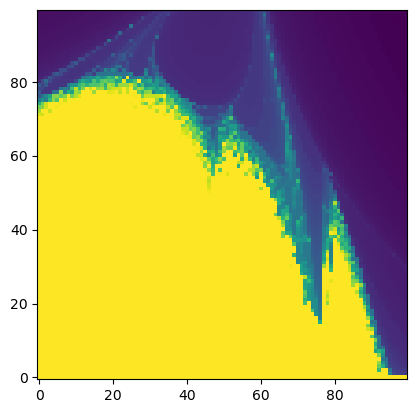

In [73]:
plt.imshow(np.log10(test_particle.get_steps()).reshape(100, 100), origin="lower")